In [252]:
# Modules
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore') #filter some warning messages
import seaborn as sns

In [253]:
ca2=np.load('./ca2_detrend_anom.npy',allow_pickle=True)
goa_cc=np.load('./goa_cclme_detrend_anom.npy',allow_pickle=True)
goa_ca=np.load('./goa_ca_detrend_anom.npy',allow_pickle=True)
cc_ca=np.load('./cclme_ca_detrend_anom.npy',allow_pickle=True)
goa_ca_t=np.load('./goa_ca_with_trend_anom.npy',allow_pickle=True)
cc_ca_t=np.load('./cclme_ca_with_trend_anom.npy',allow_pickle=True)
all_freq=[goa_ca_t,cc_ca_t,goa_ca,cc_ca,goa_cc,ca2]
name=["GOA SST during dry CA","CC SST during dry CA","GOA SST during CA drought","CC SST during CA drought","CC SST after GOA MHW","CA soil moisture after CA drought"]# ,fontsize=17)

In [254]:
all_freq[2][2].shape

(16, 22, 30, 1)

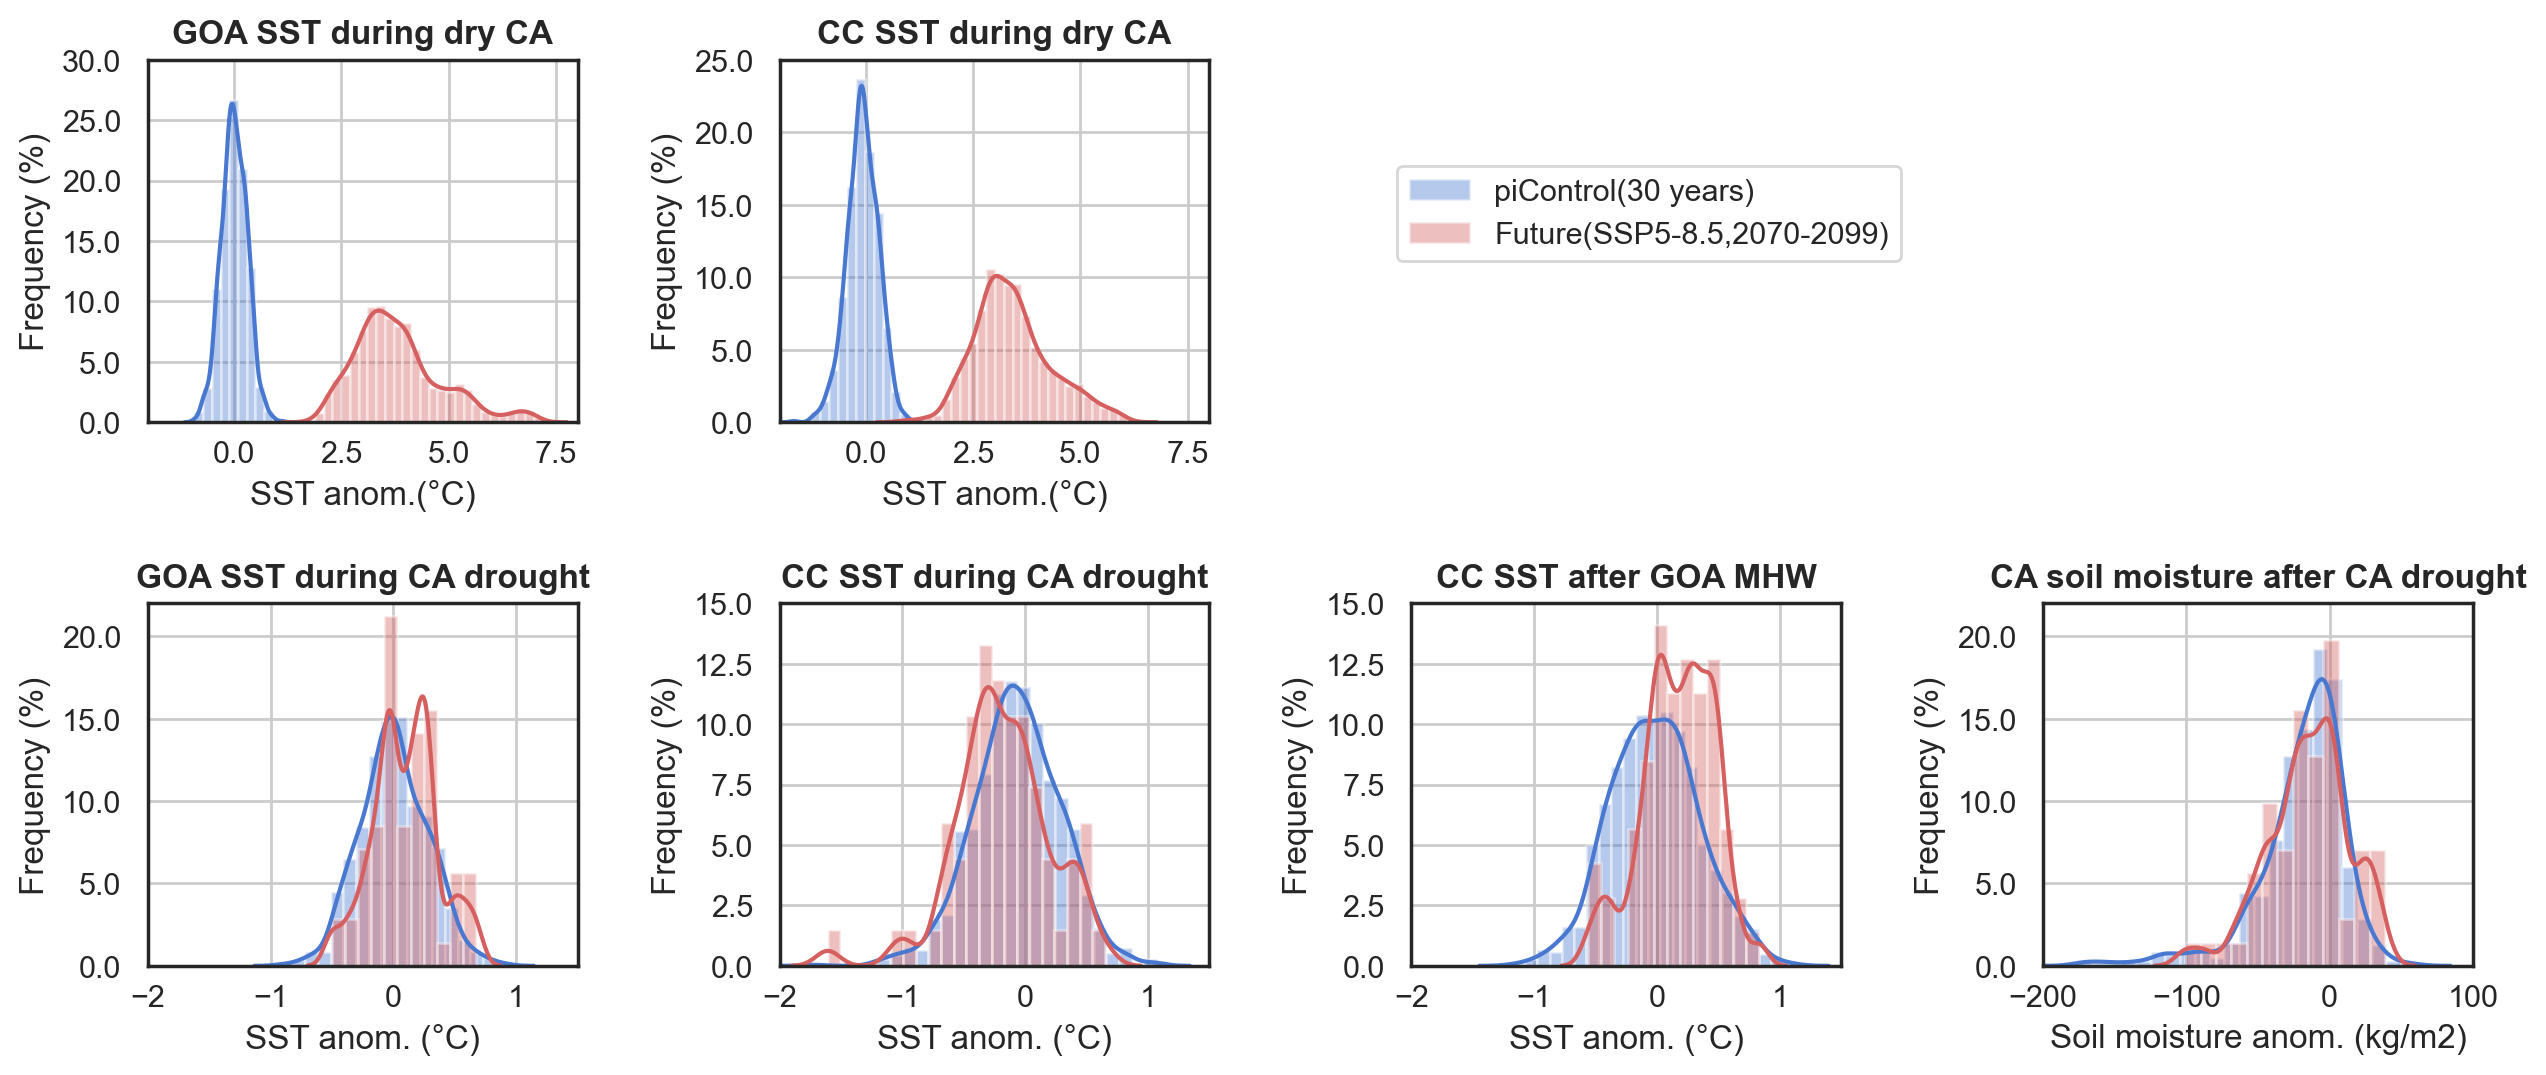

In [262]:
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(15,6),dpi=200)
for i in range(2):
    ax1  = plt.subplot(2,4,i+1)
    bw=.2
    nbin=int((max(all_freq[i][0].flatten())-min(all_freq[i][0].flatten()))/bw)

    ax1=sns.distplot(all_freq[i][0], bins=nbin,hist=True, kde=True,color='b',label='piControl(30 years)')  #, ax=axes[0, 0])hist=False,
    ax1.tick_params(axis='y')#, colors='b')
    ax1.tick_params(axis="x",direction="out", pad=.5)
    ax1.set_xlabel('SST anom.(°C)')
    if (i !=0) :
        ax1.set_ylabel('')
    
    nbin=int((max(all_freq[i][2].flatten())-min(all_freq[i][2].flatten()))/bw)
    ax1=sns.distplot(all_freq[i][2], bins=nbin,hist=True,kde=True,color='r',label='Future(SSP5-8.5,2070-2099)')  #, ax=axes[0, 0])bins=10,
    ax1.set_xlim([-2,8])
    ax1.tick_params(axis='y')#, colors='r')
    ax1.set_ylabel('')
    plt.yticks(ax1.get_yticks(), (ax1.get_yticks() * bw *100).round(1))
    plt.grid(True)
    plt.ylabel('Frequency (%)')

    ax1.set_title(name[i],fontweight='bold')

lines_1, labels_1 = ax1.get_legend_handles_labels()
#lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 #+ lines_2
labels = labels_1# + labels_2
plt.legend(lines,labels, bbox_to_anchor=(1.4, .75))

for i in range(2,5):
    ax1  = plt.subplot(2,4,i+3)
    bw=.1
    nbin=int((max(all_freq[i][0].flatten())-min(all_freq[i][0].flatten()))/bw)

    ax1=sns.distplot(all_freq[i][0], bins=nbin,hist=True, kde=True,color='b',label='PI')  #, ax=axes[0, 0])hist=False,np.mean(all_freq[i][0],axis=0)
    ax1.tick_params(axis='y')#, colors='b')
    ax1.tick_params(axis="x",direction="out", pad=.5)
    ax1.set_xlabel('SST anom. (°C)')
    if (i !=2):
        ax1.set_ylabel('')
        
    nbin=int((max(all_freq[i][2].flatten())-min(all_freq[i][2].flatten()))/bw)
    ax1=sns.distplot(all_freq[i][2], bins=nbin,hist=True,kde=True,color='r',label='Future(SSP5-8.5,2070-2099)')  #, ax=axes[0, 0])bins=10,
    ax1.set_xlim([-2,1.5])
    ax1.tick_params(axis='y')#, colors='r')
    ax1.set_ylabel('')
    plt.yticks(ax1.get_yticks(), (ax1.get_yticks() * bw *100).round(1))
    plt.grid(True)
    plt.ylabel('Frequency (%)')
    if i==2:
        ax1.set_ylim([0,2.2])

    ax1.set_title(name[i],fontweight='bold')

i=5
ax1  = plt.subplot(2,4,i+3)
bw=10
nbin=int((max(all_freq[i][0].flatten())-min(all_freq[i][0].flatten()))/bw)

ax1=sns.distplot(all_freq[i][0], bins=nbin,hist=True, kde=True,color='b',label='PI')  #, ax=axes[0, 0])hist=False,np.mean(all_freq[i][0],axis=0)
ax1.set_xlim([-200,100])
ax1.tick_params(axis='y')#, colors='b')
ax1.tick_params(axis="x",direction="out", pad=.5)
ax1.set_xlabel('Soil moisture anom. (kg/m2)')
if (i !=2):
    ax1.set_ylabel('')

nbin=int((max(all_freq[i][2].flatten())-min(all_freq[i][2].flatten()))/bw)
ax1=sns.distplot(all_freq[i][2], bins=nbin,hist=True,kde=True,color='r',label='Future(SSP5-8.5,2070-2099)')  #, ax=axes[0, 0])bins=10,
ax1.tick_params(axis='y')#, colors='r')
ax1.set_ylabel('')

plt.yticks(ax1.get_yticks(), (ax1.get_yticks() * bw *100).round(1))
ax1.set_ylim([0,0.022])
plt.grid(True)
plt.ylabel('Frequency (%)')

ax1.set_title(name[i],fontweight='bold')


plt.subplots_adjust(wspace=.47,hspace=.5)        
#plt.tight_layout(pad=0.5)  

In [256]:
ks=[]
mw=[]
from scipy import stats
from pingouin import mwu
for i in range(6):  
    x=all_freq[i][0].flatten()
    y=all_freq[i][2].flatten()
   # mw.append(stats.mannwhitneyu(x,y,alternative='two-sided'))
    mw.append( mwu(x,y)['p-val'].values)
    ks.append(stats.kstest( x,y,alternative='two-sided'))
#print(stats.kstest( x,y,alternative='less'))
#print(stats.mannwhitneyu(x,y))#,alternative='greater'))
ks,mw

([KstestResult(statistic=0.3362689393939394, pvalue=0.0),
  KstestResult(statistic=0.3362689393939394, pvalue=0.0),
  KstestResult(statistic=0.019128787878787884, pvalue=0.041428669508794314),
  KstestResult(statistic=0.020265151515151517, pvalue=0.025801510852570986),
  KstestResult(statistic=0.029450757575757575, pvalue=0.0002061188108605475),
  KstestResult(statistic=0.010416666666666657, pvalue=0.6117145080769589)],
 [array([0.]),
  array([0.]),
  array([4.20985537e-14]),
  array([2.35158178e-13]),
  array([3.48613345e-39]),
  array([0.08163769])])

In [257]:
x=all_freq[5][2].flatten()
y=all_freq[5][0].flatten()
from pingouin import mwu
mwu(x,y,tail='greater'),mwu(x,y,tail='less'),mwu(x,y,tail='one-sided')
np.nanmedian(x),np.nanmedian(y)

(-13.35190764624079, -12.861913771406932)

In [258]:
ks=[]
mw=[]
from scipy import stats
from pingouin import mwu
for i in range(6):  
    x=all_freq[i][2].flatten()
    y=all_freq[i][0].flatten()
    if i==3 :
        al='greater'
        ks.append(stats.kstest( x,y,alternative=al))
    else :
        al='less'
        ks.append(stats.kstest( x,y,alternative=al))
    
    if i==5 :
        mw.append(mwu(x,y,tail='greater'))
    else:
        mw.append( mwu(x,y,tail='one-sided' ))
        

#print(stats.kstest( x,y,alternative='less'))
#print(stats.mannwhitneyu(x,y))#,alternative='greater'))

In [259]:
ks,mw[0]['tail'][0]

([KstestResult(statistic=0.1, pvalue=1.244724571493459e-46),
  KstestResult(statistic=0.09933712121212121, pvalue=5.0275712016392045e-46),
  KstestResult(statistic=0.019128787878787884, pvalue=0.02058600219207621),
  KstestResult(statistic=0.020265151515151517, pvalue=0.012816683276321472),
  KstestResult(statistic=0.029450757575757575, pvalue=0.00010219412536110805),
  KstestResult(statistic=0.010416666666666657, pvalue=0.31466396101845967)],
 'greater')

In [260]:
pval=[]
for i in range(6):
    pval.append([ks[i][1].round(2),mw[i]['p-val'].values.round(2),mw[i]['tail'][0]])

In [261]:
pval

[[0.0, array([0.]), 'greater'],
 [0.0, array([0.]), 'greater'],
 [0.02, array([0.]), 'greater'],
 [0.01, array([0.]), 'less'],
 [0.0, array([0.]), 'greater'],
 [0.31, array([0.04]), 'greater']]